<a href="https://colab.research.google.com/github/AdilShahid/adilsqlprojects/blob/main/Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt


Understanding the data

In [ ]:
#Reading CSV

df_AH = pd.read_csv('/content/Retail Data.csv')
df_AH

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
df_AH.describe

<bound method NDFrame.describe of      Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amou

In [ ]:
#looking for missing values
df_AH.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

<ipython-input-36-3ddd0e9050e6>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x='Product Category', y='Total Amount', data=df_AH.groupby('Product Category').sum().reset_index())


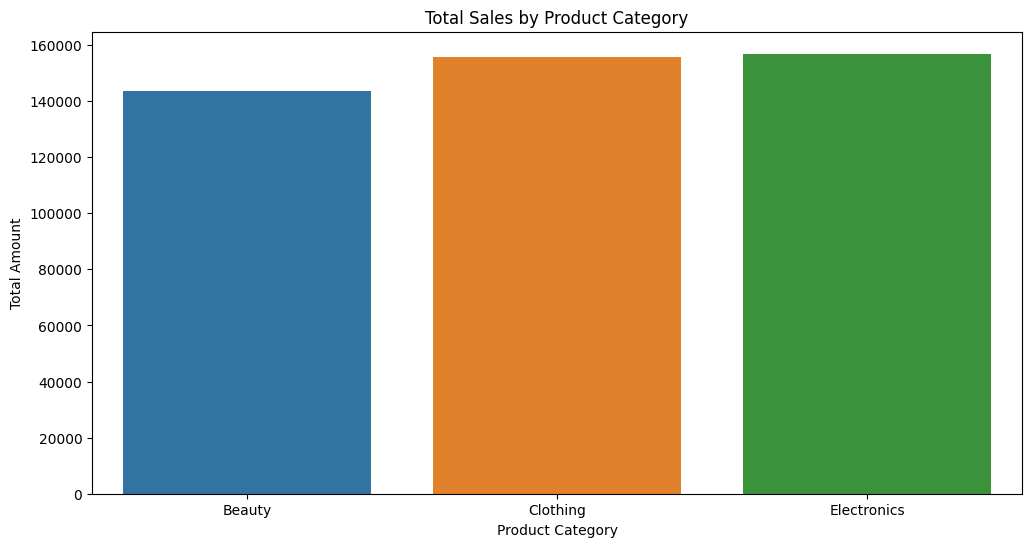

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Category', y='Total Amount', data=df_AH.groupby('Product Category').sum().reset_index())
plt.title('Total Sales by Product Category')
plt.xticks()
plt.show()

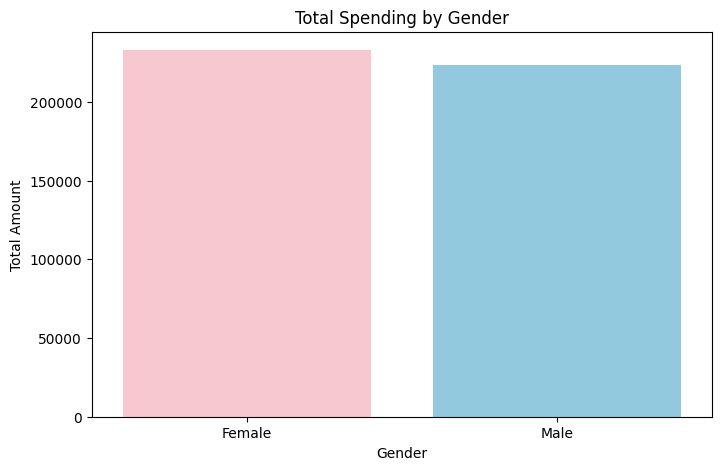

In [ ]:
#seeing which gender is spending more
gender_spending = df_AH.groupby('Gender')['Total Amount'].sum().reset_index()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Total Amount', data=gender_spending, palette={'Male': 'skyblue', 'Female': 'pink'})
plt.title('Total Spending by Gender')
plt.show()

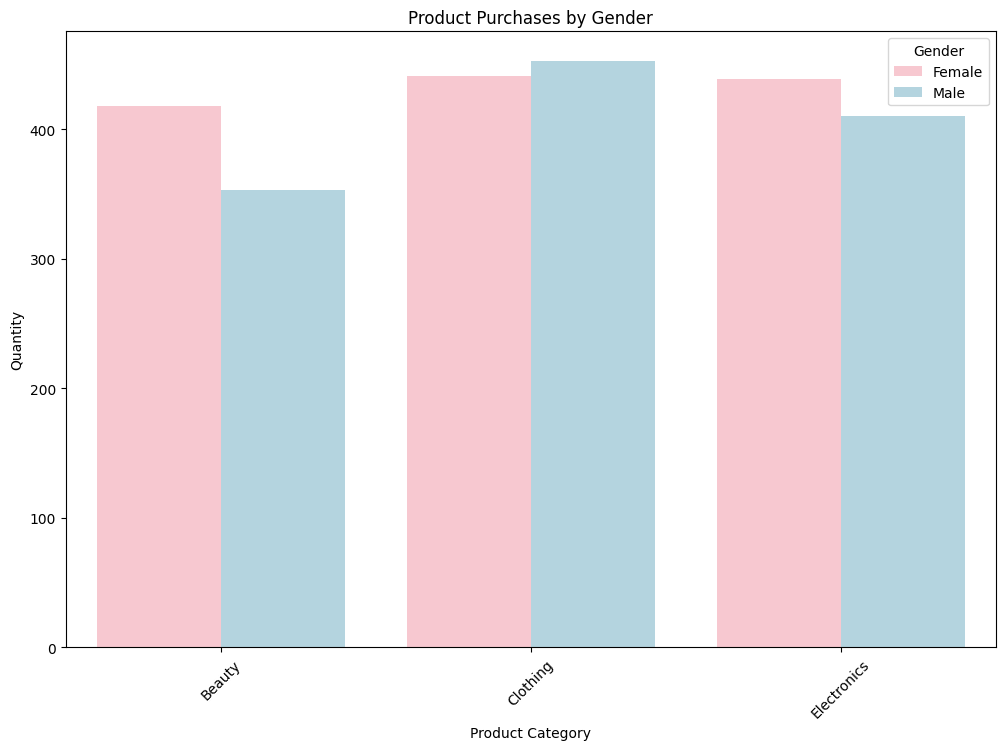

In [ ]:
# quantity purchased by each gender for each product
gender_product_purchase = df_AH.groupby(['Gender', 'Product Category'])['Quantity'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(
    x='Product Category',
    y='Quantity',
    hue='Gender',
    data=gender_product_purchase,
    palette={'Male': 'lightblue', 'Female': 'pink'}
)
plt.title('Product Purchases by Gender')
plt.xticks(rotation=45)
plt.show()


In [ ]:
returning_customers = df_AH[df_AH.duplicated(subset=['Customer ID'], keep=False)]

# Count the number of repurchases made by returning customers
repurchases_count_by_returning_customers = returning_customers.groupby('Customer ID')['Transaction ID'].count()

# Filter customers with more than one purchase
total_repeat_customers = repurchases_count_by_returning_customers[repurchases_count_by_returning_customers > 1]

# Print the count of total repeat customers
print("Total count of repeat customers:", len(total_repeat_customers))


Total count of repeat customers: 0


Visualising spending habbits of each age bracket of both genders to help with decision making.

In [ ]:
#age groups
bins = [0, 18, 35, 50, float('inf')]
labels = ['0_18', '19_35', '35_50', '50+']

# Create a new column 'Age Group'
df_AH['Age Group'] = pd.cut(df_AH['Age'], bins=bins, labels=labels, right=False)

# Calculate average transaction size by gender and age group
avg_transaction_size_by_group = df_AH.groupby(['Gender', 'Age Group'])['Total Amount'].mean().reset_index()

# Print or display the result
print(avg_transaction_size_by_group)


   Gender Age Group  Total Amount
0  Female      0_18           NaN
1  Female     19_35    504.425287
2  Female     35_50    433.757396
3  Female       50+    429.730539
4    Male      0_18           NaN
5    Male     19_35    471.741573
6    Male     35_50    474.125874
7    Male       50+    422.426036


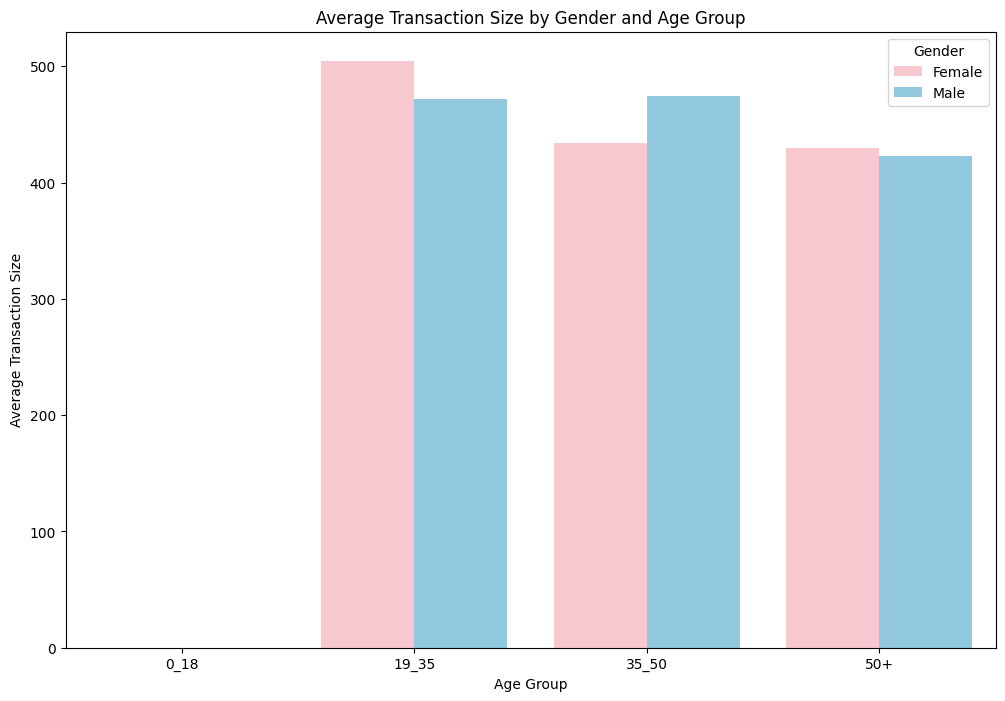

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Age Group', y='Total Amount', hue='Gender', data=avg_transaction_size_by_group, palette={'Male': 'skyblue', 'Female': 'pink'})
plt.title('Average Transaction Size by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Transaction Size')
plt.show()

**Monthly Trend Analysis for Retail Data**

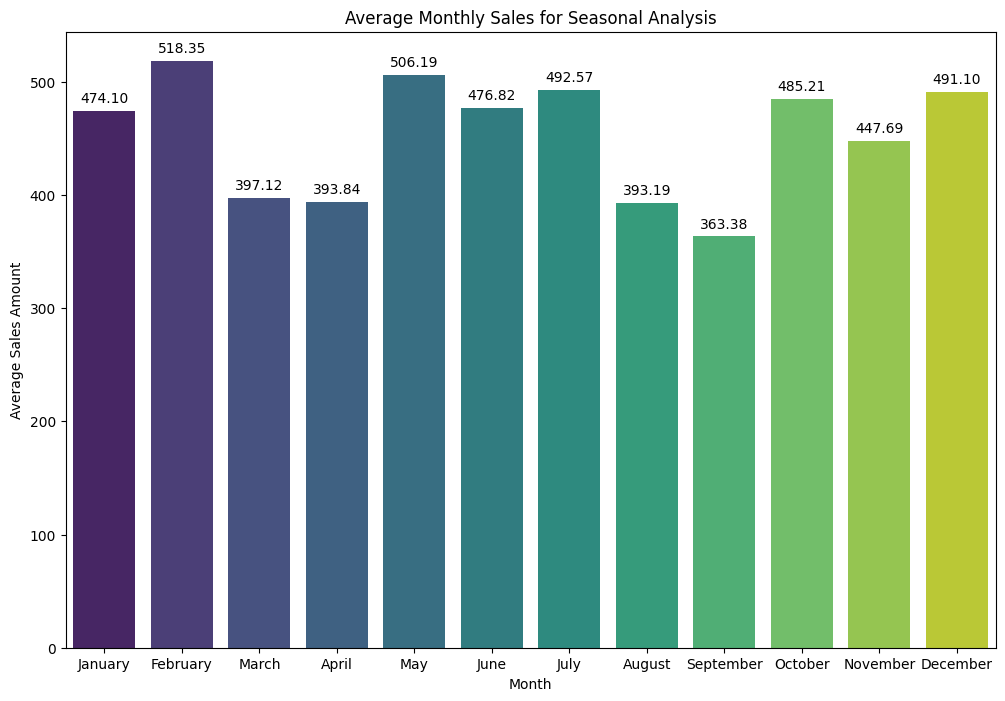

In [ ]:
df_AH['Date'] = pd.to_datetime(df_AH['Date'])

# Extract month from the 'Date' column and create a new 'Month' column
df_AH['Month'] = df_AH['Date'].dt.month_name()

average_monthly_sales = df_AH.groupby('Month')['Total Amount'].mean().reset_index()

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
average_monthly_sales['Month'] = pd.Categorical(average_monthly_sales['Month'], categories=months_order, ordered=True)
average_monthly_sales = average_monthly_sales.sort_values('Month')

#Details for the Bar Graph Plot

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Month', y='Total Amount', data=average_monthly_sales, palette='viridis')

# Adding data labels on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Average Monthly Sales for Seasonal Analysis')
plt.xlabel('Month')
plt.ylabel('Average Sales Amount')
plt.show()

**Average Monthly Sales for Beauty Products**

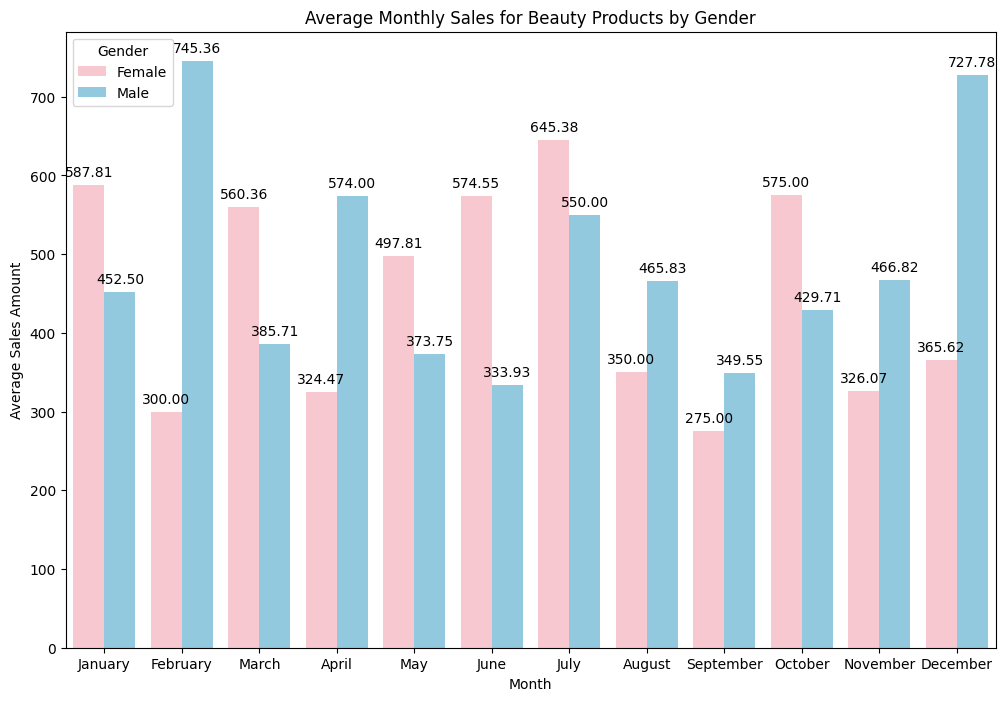

In [ ]:
df_AH['Date'] = pd.to_datetime(df_AH['Date'])
df_AH['Month'] = df_AH['Date'].dt.month_name()

# Creating a New DataFrame for the new graph.
filtered_df_AH = df_AH[(df_AH['Product Category'] == 'Beauty') & (df_AH['Gender'].isin(['Male', 'Female']))]

average_monthly_sales = filtered_df_AH.groupby(['Month', 'Gender'])['Total Amount'].mean().reset_index()

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
average_monthly_sales['Month'] = pd.Categorical(average_monthly_sales['Month'], categories=months_order, ordered=True)
average_monthly_sales = average_monthly_sales.sort_values(['Month', 'Gender'])
gender_palette = {'Male': 'skyblue', 'Female': 'pink'}

# Details for the Bar Graph Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Month', y='Total Amount', hue='Gender', data=average_monthly_sales, palette=gender_palette)

# Adding data labels on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')


plt.title('Average Monthly Sales for Beauty Products by Gender')
plt.xlabel('Month')
plt.ylabel('Average Sales Amount')
plt.legend(title='Gender')
plt.show()

**Building a Linear Regression Model to Predict Category Sales for the Next Year in Months**

In [ ]:
#Removing any unncessary data for 2024 to predict accurately based on 2023
df_AH_23 = df_AH[df_AH['Date'].dt.year != 2024]
df_AH_23


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Group,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,19_35,November
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,19_35,February
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,50+,January
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,35_50,May
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,19_35,May
...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,50+,May
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,50+,November
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,19_35,October
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,35_50,December


In [ ]:
#Importing Relevant Libraries to run Linear Regression Model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
# Extract features (X) and target variable (y)
X = df_AH[(df_AH['Product Category'] == 'Beauty')].groupby(['Month', 'Gender'])['Total Amount'].mean().reset_index()
y = X.pop('Total Amount')

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['Month', 'Gender'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

# Now, you can use the model to predict sales for the beauty category in the months of 2024
# Prepare the input features for 2024
months_2024 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
gender_values = X['Gender'].unique()
features_2024 = []

for month in months_2024:
    for gender in gender_values:
        features_2024.append({'Month': month, 'Gender': gender})

features_2024_df = pd.DataFrame(features_2024)

# Convert categorical variables to numerical using one-hot encoding
features_2024_encoded = pd.get_dummies(features_2024_df, columns=['Month', 'Gender'], drop_first=True)

# Make predictions for 2024
predictions_2024 = model.predict(features_2024_encoded)

# Add the predictions to the original DataFrame for 2024
features_2024_df['Predicted_Sales'] = predictions_2024

# Display the predictions for 2024
print(features_2024_df[['Month', 'Gender', 'Predicted_Sales']])

Mean Squared Error: 27990.24671043541
        Month  Gender  Predicted_Sales
0     January  Female       390.023593
1     January    Male       452.500000
2    February  Female       491.440368
3    February    Male       553.916775
4       March  Female       441.797511
5       March    Male       504.273918
6       April  Female       511.523593
7       April    Male       574.000000
8         May  Female       311.273593
9         May    Male       373.750000
10       June  Female       422.998809
11       June    Male       485.475217
12       July  Female       645.384615
13       July    Male       707.861023
14     August  Female       376.678463
15     August    Male       439.154870
16  September  Female       281.034524
17  September    Male       343.510931
18    October  Female       471.114738
19    October    Male       533.591145
20   November  Female       404.341775
21   November    Male       466.818182
22   December  Female       515.463185
23   December    Male     

**Visualizing the Predicted Sales**

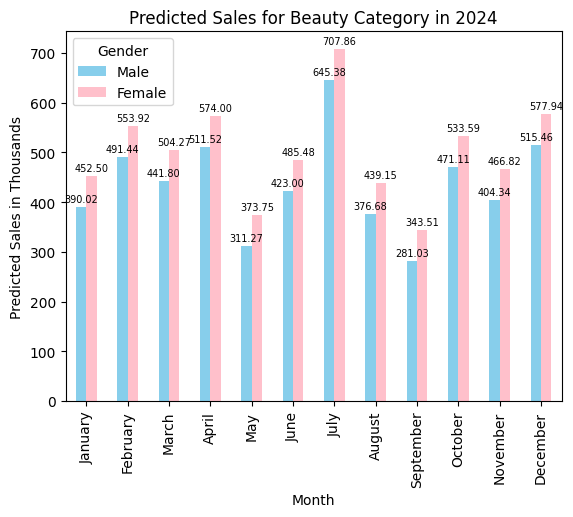

In [ ]:
import calendar
import matplotlib.pyplot as plt

# Display the predictions for 2024
predictions_df = features_2024_df[['Month', 'Gender', 'Predicted_Sales']]

# Convert 'Month' to a categorical variable with a custom order
month_order = [calendar.month_name[i] for i in range(1, 13)]
predictions_df['Month'] = pd.Categorical(predictions_df['Month'], categories=month_order, ordered=True)

# Pivot the DataFrame for easier plotting
predictions_pivot = predictions_df.pivot(index='Month', columns='Gender', values='Predicted_Sales')

# Plotting with custom colors
ax = predictions_pivot.plot(kind='bar', color=['skyblue', 'pink'], width = 0.5)
plt.title('Predicted Sales for Beauty Category in 2024')
plt.xlabel('Month')
plt.ylabel('Predicted Sales in Thousands')
plt.legend(title='Gender', loc='upper right')

# Customize the legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Male', 'Female'], title='Gender', loc='upper left')

# Add data labels with rounded values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=7, color='black', weight='light', padding=2)

plt.show()
